In [1]:
from nltools.datasets import download_collection
from nltools.data import Brain_Data
from nilearn import image
from nilearn.masking import compute_epi_mask
from nltools.analysis import Roc
from nltools.stats import correlation
import numpy as np
import pandas as pd
import glob
import nilearn.plotting as plotting


## load data

In [2]:
files=sorted(glob.glob("/Users/danicosme/Desktop/MVPA_CUEREACT/*.nii"))
metadata=pd.read_csv("/Users/danicosme/Desktop/MVPA_CUEREACT_scripts/metadata/metadata_cuereact.csv")

print(len(files))
print(len(metadata))
print(files[0:8])
print('\n', metadata[0:8])

296
296
['/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_alc_react_mindfulness_1.nii', '/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_alc_react_mindfulness_2.nii', '/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_alc_react_mindfulness_3.nii', '/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_alc_react_mindfulness_4.nii', '/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_downreg_mindfulness_1.nii', '/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_downreg_mindfulness_2.nii', '/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_downreg_mindfulness_3.nii', '/Users/danicosme/Desktop/MVPA_CUEREACT/MURIC202_downreg_mindfulness_4.nii']

    id subjectID trial_type  run    condition       sample
0   1  MURIC202  alc_react    1  mindfulness  development
1   2  MURIC202  alc_react    2  mindfulness  development
2   3  MURIC202  alc_react    3  mindfulness      holdout
3   4  MURIC202  alc_react    4  mindfulness  development
4   5  MURIC202    downreg    1  mindfulness  development
5   6  MURIC202  

In [3]:
data = Brain_Data(files,X=metadata)

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/usr/local/lib/python3.7/site-packages/nilearn/image/resampling.py:583: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_va

In [4]:
# #data_unmasked = data
# data = data_unmasked
# mask = image.load_img('/Users/danicosme/Documents/code/dsnlab/FP_scripts/fMRI/mvpa/wave1/rocc/goal_p005_k126_mask.nii.gz')
# mask.set_data_dtype(np.int32)
# # from nilearn.image import load_img, math_img
# # mask2 = math_img('img > 0', img=mask)
# data = data_unmasked.apply_mask(mask)

# plotting.plot_glass_brain(mask)

# # from nibabel import save
# # save(mask, "/Users/danicosme/Desktop/mask2.nii.gz")

#mask.set_data_dtype(np.int32)
# print(data.data.dtype)
# print(mask.header)

## partition data

In [5]:
# task data
X_development = data.X.loc[data.X['sample']=='development']
Y_development = X_development['trial_type']
print('Development N data = ', len(X_development))
print('Development N class = ', len(Y_development))

X_holdout = data.X.loc[data.X['sample']=='holdout']
Y_holdout = X_holdout['trial_type']
print('Holdout N data = ', len(X_holdout))
print('Holdout N class = ', len(Y_holdout))

Development N data =  222
Development N class =  222
Holdout N data =  74
Holdout N class =  74


## run regulate v. react classification

In [6]:
# specify react and regulate data in the development sample
development = data[np.where(data.X['id'].isin(X_development['id']))[0]]
holdout = data[np.where(data.X['id'].isin(X_holdout['id']))[0]]

react = development[np.where(development.X['trial_type']=='alc_react')[0]]
regulate = development[np.where(development.X['trial_type']=='downreg')[0]]
dat = regulate.append(react)
dat.Y = pd.DataFrame(np.concatenate([np.ones(len(regulate)),np.zeros(len(react))]))
subject_id = np.concatenate([regulate.X['subjectID'].values,react.X['subjectID'].values])


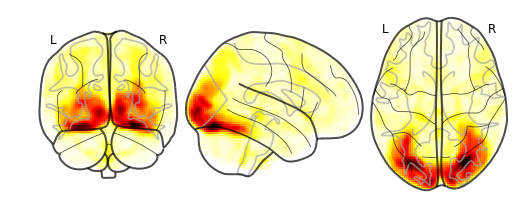

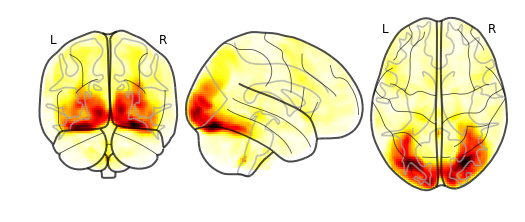

In [7]:
# mean activation
plotting.plot_glass_brain(react.mean().to_nifti())
plotting.plot_glass_brain(regulate.mean().to_nifti())

overall accuracy: 1.00
overall CV accuracy: 0.56


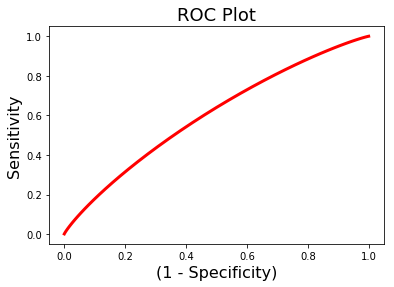

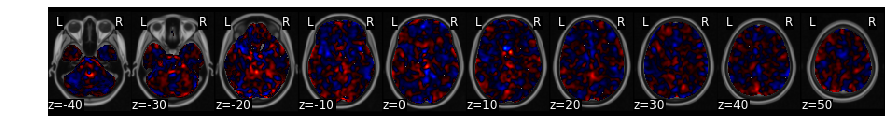

In [8]:
# run model
logistic_stats = dat.predict(algorithm='logistic',
                                  cv_dict={'type': 'kfolds', 'n_folds': 5 ,
                                           'subject_id': subject_id,
                                           'stratified':dat.Y},
                                  **{'max_iter': 1000})


In [9]:
# platt_stats = dat.predict(algorithm='svm',
#                           cv_dict={'type': 'kfolds','n_folds': 5,
#                                    'subject_id':subject_id,
#                                    'stratified':dat.Y},
#                           **{'kernel':'linear','probability':True})


In [10]:
# ridge_stats = dat.predict(algorithm='ridgeClassifier',
#                           cv_dict={'type': 'kfolds','n_folds': 5,
#                                    'subject_id':subject_id,
#                                    'stratified':dat.Y})

------------------------
.:ROC Analysis Summary:.
------------------------
Accuracy:           0.58
Accuracy SE:        0.04
Accuracy p-value:   0.02
Sensitivity:        0.38
Specificity:        0.78
AUC:                0.58
PPV:                0.64
------------------------


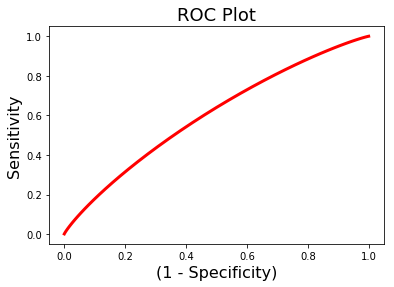

In [32]:
# plot ROC
roc_logistic = Roc(input_values=logistic_stats['prob_xval'][:,1], 
		binary_outcome=logistic_stats['Y'].astype(bool))
roc_logistic.plot()
roc_logistic.summary()

In [30]:
pd.DataFrame({'subjectID': subject_id, 
              'predicted': logistic_stats['prob_xval'][:,1], 
              'actual': logistic_stats['Y']}).to_csv("/Users/danicosme/Desktop/MVPA_CUEREACT_scripts/logistic_stats.csv", 
                                                          float_format='%.15f',
                                                         index=False)

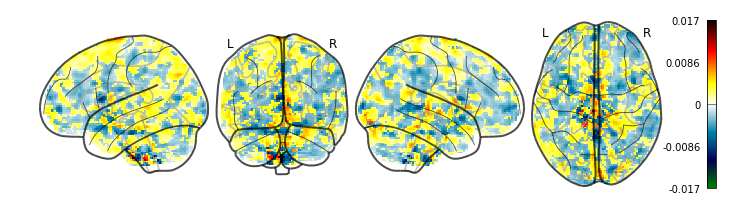

In [31]:
plotting.plot_glass_brain(logistic_stats['weight_map'].to_nifti(), display_mode='lyrz', colorbar=True, plot_abs=False, cmap=plotting.cm.ocean_hot)
logistic_stats['weight_map'].write('/Users/danicosme/Desktop/MVPA_CUEREACT_scripts/logistic_weightmap.nii')


## whole-brain parcellation

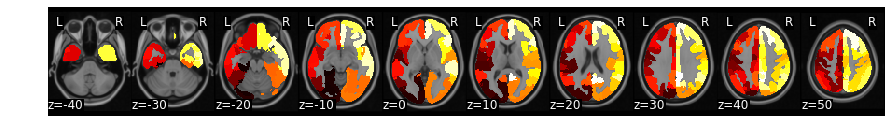

In [15]:
from nltools.mask import expand_mask, collapse_mask
from nltools.data import Brain_Data
parcellation = Brain_Data('/Users/danicosme/Documents/parcellations/Schaefer/MNI/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz')
parcellation_x = expand_mask(parcellation)
parcellation.plot()


In [16]:
out = []
for p in parcellation_x:
    out.append(dat.apply_mask(p).predict(algorithm='logistic',
                                         cv_dict={'type': 'kfolds', 
                                                 'n_folds': 5, 
                                                 'subject_id': subject_id, 
                                                 'stratified':dat.Y},
                                         **{'max_iter': 10000},
                                               plot=False))

overall accuracy: 0.93
overall CV accuracy: 0.49
overall accuracy: 0.91
overall CV accuracy: 0.49
overall accuracy: 0.89
overall CV accuracy: 0.47
overall accuracy: 1.00
overall CV accuracy: 0.49
overall accuracy: 0.98
overall CV accuracy: 0.54
overall accuracy: 0.92
overall CV accuracy: 0.49
overall accuracy: 0.83
overall CV accuracy: 0.47
overall accuracy: 0.99
overall CV accuracy: 0.50
overall accuracy: 0.90
overall CV accuracy: 0.49
overall accuracy: 1.00
overall CV accuracy: 0.51
overall accuracy: 0.81
overall CV accuracy: 0.52
overall accuracy: 0.94
overall CV accuracy: 0.50
overall accuracy: 0.82
overall CV accuracy: 0.52
overall accuracy: 0.97
overall CV accuracy: 0.49
overall accuracy: 1.00
overall CV accuracy: 0.56
overall accuracy: 1.00
overall CV accuracy: 0.52
overall accuracy: 0.80
overall CV accuracy: 0.50
overall accuracy: 1.00
overall CV accuracy: 0.46
overall accuracy: 0.77
overall CV accuracy: 0.52
overall accuracy: 0.86
overall CV accuracy: 0.51
overall accuracy: 0.

In [18]:
# save predictions as a csv
a = pd.DataFrame(out, columns = ['prob_xval']).explode('prob_xval')
b = pd.DataFrame(a['prob_xval'].values.tolist(), columns=['prob0','predicted'])
c = pd.DataFrame(out, columns = ['Y']).explode('Y')
c['predicted'] = np.array(b)[:,1]
c['subjectID'] = np.tile(subject_id, 100)
c.rename(columns={"Y": "actual"}).to_csv('/Users/danicosme/Desktop/MVPA_CUEREACT_scripts/parcellation.csv',
                                        float_format='%.15f')

## apply classifier to trial-level data

In [56]:
dots = []
for b in range(0,len(data)):
    dots.append(np.dot(logistic_stats['weight_map'].data, data.data[b]))
    
data.X['dot'] = dots
data.X.to_csv("/Users/danicosme/Desktop/MVPA_CUEREACT_scripts/dots.csv", 
                                                          float_format='%.15f',
                                                         index=False)

In [66]:
import sklearn
sklearn.__version__

'0.24.0'